## Machine Learning - Aprendizaje no supervisado:
## Clustering


- ¿Qué es el aprendizaje no supervisado?
     - Un grupo de algoritmos de aprendizaje automático que encuentran patrones en los datos.
     - Los datos de los algoritmos no se han etiquetado, clasificado ni caracterizado
     - El objetivo del algoritmo es interpretar cualquier estructura en los datos
     - Algoritmos de aprendizaje no supervisados comunes: agrupación, red neuronal, detección de anomalías
- ¿Qué es la agrupación?
     - El proceso de agrupación de artículos con características similares
     - Elementos en grupos similares entre sí que en otros grupos
     - Ejemplo: distancia entre puntos en un plano 2D

## Cluster análisis
- ¿Qué es un clúster?
     - Un grupo de artículos con características similares
     - Google News: artículos en los que aparecen juntas palabras similares y asociaciones de palabras.
     - Segmentos de clientes
- Algoritmos de agrupación
     - Agrupación jerárquica
     - Agrupación de K-means
     - Otros algoritmos de agrupamiento por densidad: DBSCAN, métodos gaussianos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La agrupación en clústeres es uno de los tipos de aprendizaje no supervisado. Es similar a la clasificación: el objetivo es dar una etiqueta a cada punto de datos. Sin embargo, a diferencia de la clasificación, no se nos da ningún ejemplo de etiquetas asociadas con los puntos de datos. Debemos inferir de los datos qué puntos de datos pertenecen al mismo grupo. Esto se puede lograr usando alguna noción de distancia entre los puntos de datos. Los puntos de datos en el mismo grupo están de alguna manera cercanos entre sí.

Uno de los métodos de agrupamiento en clústeres más simples es el agrupamiento en clústeres *k-means*. Su objetivo es producir una agrupación que sea óptima en el siguiente sentido:

* el *centro de cada grupo* es el promedio de todos los puntos en el grupo
* cualquier punto de un grupo está más cerca de su centro que del centro de cualquier otro grupo

Al agrupamiento de k-medias se le da primero el número deseado de grupos, digamos k, como un *hiperparámetro*. A continuación, para iniciar el algoritmo, se eligen al azar k puntos del conjunto de datos como centros de conglomerados. Luego, las siguientes fases se repiten iterativamente:

* cualquier punto de datos está configurado para pertenecer a un clúster, cuyo centro está más cerca de él
* luego, para cada grupo, se elige un nuevo centro como el promedio de los puntos de datos en el grupo

Este procedimiento se repite hasta que los grupos ya no cambian. Este tipo de algoritmo se denomina algoritmo de maximización de expectativas (EM), que se sabe que converge.

### Ejemplo Simple

La biblioteca scikit-learn tiene una implementación del algoritmo k-means. Aplicémoslo a un conjunto de blobs generados aleatoriamente, cuyas etiquetas desechamos.

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


Ahora trazamos estos puntos, pero sin colorear los puntos usando las etiquetas:

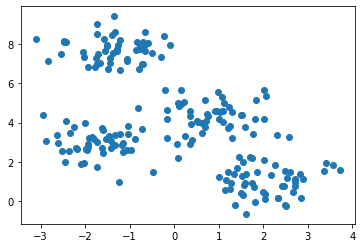

In [4]:
plt.scatter(X[:,0],X[:,1]);

Todavía podemos discernir cuatro grupos en el conjunto de datos. Veamos si el algoritmo k-means puede recuperar estos clústeres. Primero creamos la instancia del modelo k-means dándole el número de clústeres 4 como hiperparámetro.

In [15]:
from sklearn.cluster import KMeans
model = KMeans(4)#cantidad de clusters
model.fit(X)
print(model.cluster_centers_)
print(model.labels_)

[[-1.70639178  2.9104771 ]
 [-1.36512238  7.70188306]
 [ 0.86008475  4.31501411]
 [ 2.07464749  0.9869902 ]]
[3 0 2 1 3 2 0 2 2 2 2 3 0 0 3 2 1 1 1 3 1 0 3 0 3 3 1 3 3 2 1 2 0 3 0 2 0
 2 2 1 1 1 1 2 3 0 2 1 1 2 1 0 0 1 2 1 0 3 2 3 1 2 3 2 1 2 3 1 0 0 3 3 2 2
 0 1 0 0 3 3 1 2 3 0 0 2 2 3 0 0 1 1 1 2 2 3 0 1 2 2 1 3 3 1 1 0 2 3 3 2 1
 0 0 3 3 2 0 0 1 2 1 0 2 3 2 0 2 0 3 2 0 3 2 1 1 0 1 1 3 1 3 0 3 3 0 3 2 3
 0 1 1 1 2 0 3 2 1 0 1 3 1 3 3 0 0 1 2 3 3 0 3 2 0 1 1 1 2 2 0 2 2 3 2 3 2
 0 0 1 2 1 3 3 2 1 0 0 0 2 1 3]


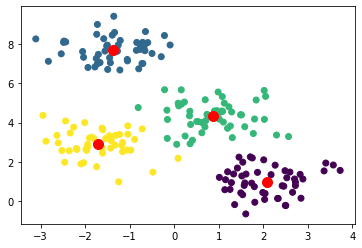

In [8]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

La agrupación parece más o menos correcta. Para obtener una medida más cuantitativa del éxito, podemos obtener la puntuación de precisión.

In [9]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("El valor de precisión es:", acc)

El valor de precisión es: 0.01


¡Ups! Aunque los grupos podrían coincidir casi perfectamente con el original, sus etiquetas podrían permutarse. Seleccionemos al azar un punto de cada grupo y verifiquemos sus etiquetas de las etiquetas de datos originales. Luego usamos esta etiqueta para todo el grupo. En esencia, estamos cambiando el nombre de los clústeres, no reagrupando los datos.

In [10]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [11]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[1, 3, 0, 2]


In [12]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 0.99


Entonces, el algoritmo k-means parece funcionar bien en este caso, pero puede haber varios problemas. En primer lugar, aunque un algoritmo EM siempre converge, podría converger a un máximo local. Para evitar esto, los algoritmos de tipo EM se suelen ejecutar varias veces, cada vez partiendo de diferentes valores iniciales aleatorios. Por ejemplo, en la implementación de scikit-learn, los algoritmos se reinician de forma predeterminada 10 veces.

## Preparación de datos para análisis de conglomerados
- ¿Por qué necesitamos preparar los datos para la agrupación?
     - Las variables tienen unidades incomparables
     - Las variables con las mismas unidades tienen escalas y variaciones muy diferentes
     - Los datos en forma sin procesar pueden generar sesgos en la agrupación
     - Los clústeres pueden depender en gran medida de una variable
     - Solución: normalización de variables individuales

### Normalizar los datos básicos de la lista
Ahora que conoce la normalización, intentemos normalizar algunos datos. ```goal_for``` es una lista de goles marcados por un equipo de fútbol en sus últimos diez partidos. Estandaricemos los datos usando la función `` whiten ()``.



Una **transformación blanqueadora** o **transformación esférica** es una transformación lineal que transforma un vector de variables aleatorias con una matriz de covarianza conocida en un conjunto de nuevas variables cuya covarianza es la matriz de identidad, lo que significa que no están correlacionadas y cada una tienen varianza 1. La transformación se llama "blanqueamiento" porque cambia el vector de entrada en un vector de ruido blanco.

Varias otras transformaciones están estrechamente relacionadas con el blanqueamiento:

la **transformada de decorrelación** elimina solo las correlaciones pero deja las variaciones intactas,

la **transformada de estandarización** establece las varianzas en 1 pero deja las correlaciones intactas,

una **transformación de color** transforma un vector de variables aleatorias blancas en un vector aleatorio con una matriz de covarianza específica

In [16]:
from scipy.cluster.vq import whiten

goals_for = [4, 3, 2, 3, 1, 1, 2, 0, 1, 4]

# Usar la función whiten() para normalizar los datos
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


### Visualice datos normalizados
Después de normalizar sus datos, puede comparar los datos escalados con los datos originales para ver la diferencia.

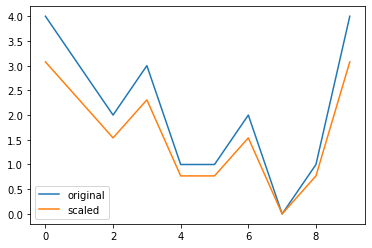

In [17]:
plt.plot(goals_for, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.savefig('scaled_data.png')

### Normalización de números pequeños
En ejemplos anteriores, tiene la normalización de números enteros. En este ejercicio, observará el tratamiento de los números fraccionarios: el cambio de las tasas de interés en el país de Bangalla a lo largo de los años.

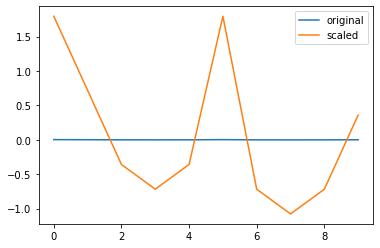

In [18]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# use the whiten() to standardize the data
scaled_data = whiten(rate_cuts)

plt.plot(rate_cuts, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()

### FIFA 18: Normalizar datos
FIFA 18 es un videojuego de fútbol que se lanzó en 2017 para PC y consolas. El conjunto de datos en el que está a punto de trabajar contiene datos sobre los 1000 mejores jugadores individuales del juego. Explorará varias características de los datos a medida que avancemos en el curso. En este ejercicio, trabajará con dos columnas, ``eur_wage``, el salario de un jugador en Euros y `` eur_value``, su valor actual de mercado de transferencias.

- Preprocesamiento

In [30]:
fifa = pd.read_csv('sesion2_fifa_18_sample_data.csv')
fifa.columns
fifa


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [31]:
fifa['eur_wage'].head()
fifa['eur_value'].head()

0     95500000.0
1    105000000.0
2    123000000.0
3     97000000.0
4     61000000.0
Name: eur_value, dtype: float64

            eur_wage     eur_value
count    1000.000000  1.000000e+03
mean    69432.000000  1.788405e+07
std     62034.277844  1.369776e+07
min         0.000000  0.000000e+00
25%     29000.000000  1.000000e+07
50%     53000.000000  1.400000e+07
75%     87250.000000  2.112500e+07
max    565000.000000  1.230000e+08
       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


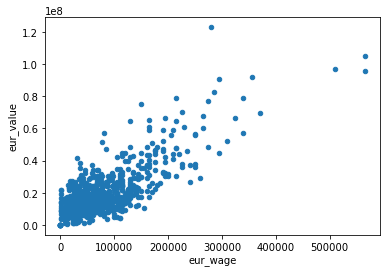

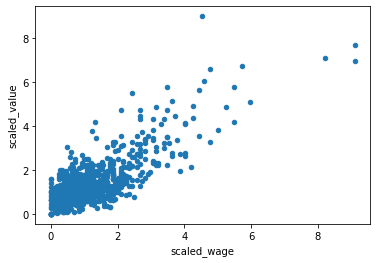

In [32]:
# Escalar wage y su valor
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

fifa.plot(x='eur_wage', y='eur_value', kind='scatter');
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter');

# Check mean and standard deviation of scaled values
print(fifa[['eur_wage', 'eur_value']].describe())
print(fifa[['scaled_wage', 'scaled_value']].describe())

In [33]:
fifa_kmeans=fifa[['scaled_wage','scaled_value']].copy()
fifa_kmeans

,scaled_wage,scaled_value
0,9.112425,6.975431
1,9.112425,7.669323
2,4.515892,8.984064
3,8.225375,7.084993
4,3.709483,4.455511
...,...,...
995,0.499974,0.657371
996,0.129025,0.584329
997,0.145154,0.314077
998,0.516102,0.511288


### Método del codo en grupos distintos
Usemos el conjunto de datos de la Comic Con para ver cómo se ve el diagrama de codo en un conjunto de datos con grupos distintos y bien definidos. Es posible que desee mostrar los puntos de datos antes de continuar con el ejercicio.

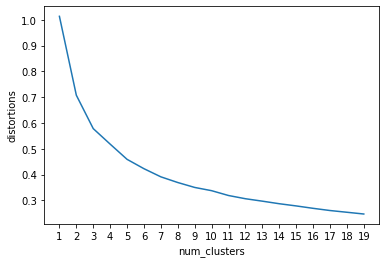

In [34]:
distortions = []
num_clusters = range(1, 20)
from scipy.cluster.vq import kmeans, vq

# Create a list of distortions from the kmeans function
for k in num_clusters:
    cluster_centers, distortion = kmeans(fifa[['scaled_wage','scaled_value']], k)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot);
plt.xticks(num_clusters);

In [35]:
elbow_plot

,num_clusters,distortions
0,1,1.013517
1,2,0.707713
2,3,0.578218
3,4,0.518072
4,5,0.459084
5,6,0.422756
6,7,0.391198
7,8,0.369171
8,9,0.350113
9,10,0.337551


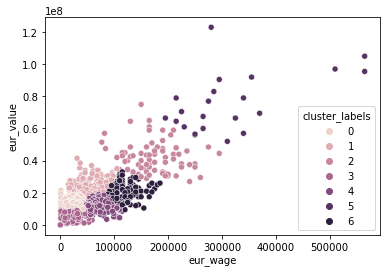

In [42]:
# Generate cluster centers
cluster_centers, distortions = kmeans(fifa[['scaled_wage','scaled_value']], 7)

# Assign cluster labels
fifa['cluster_labels'], distortion_list = vq(fifa[['scaled_wage','scaled_value']], cluster_centers)

# Plot clusters
sns.scatterplot(x='eur_wage', y='eur_value', hue='cluster_labels', data=fifa);

In [40]:
fifa


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_wage,scaled_value,cluster_labels
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,9.112425,6.975431,0
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,9.112425,7.669323,0
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,4.515892,8.984064,0
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,8.225375,7.084993,0
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,True,3.709483,4.455511,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,False,False,False,False,False,False,0.499974,0.657371,1
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,0.129025,0.584329,1
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,0.145154,0.314077,1
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,True,0.516102,0.511288,1


## k-means clustering
- ¿Por qué agrupación de k-medias?
     - K significa se ejecuta significativamente más rápido en grandes conjuntos de datos
- Agrupación de K-medias
     - Generar centros de clústeres
     - Generar etiquetas de clúster

Recuerde los dos pasos de la agrupación en clústeres de k-medias:

- Definir centros de clústeres mediante la función `` kmeans () '' `. Tiene dos argumentos obligatorios: observaciones y número de conglomerados.
- Asignar etiquetas de clúster a través de la función `` vq () ''. Tiene dos argumentos necesarios: observaciones y centros de conglomerados.

- Preprocesamiento

In [ ]:
comic_con = pd.read_csv('sesion2_comic_con.csv', index_col=0)
comic_con.head()

In [ ]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

In [ ]:
comic_con.info()

In [ ]:
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortions = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

In [ ]:
comic_con

## Limitaciones de la agrupación en clústeres de k-medias
- Limitaciones de la agrupación en clústeres de k-medias
     - Cómo encontrar la K correcta
     - Impacto de semillas
     - Sesgado hacia grupos de igual tamaño

### Impacto de las semillas en distintos racimos

El método seed () se utiliza para inicializar el generador de números aleatorios.

El generador de números aleatorios necesita un número para comenzar (un valor inicial), para poder generar un número aleatorio.

Por defecto, el generador de números aleatorios usa la hora actual del sistema.
Utilice el método seed () para personalizar el número de inicio del generador de números aleatorios.

* semilla aleatoria * (a, versión)

* a * Opcional. El valor inicial necesario para generar un número aleatorio.
Si es un número entero, se usa directamente, si no, se debe convertir en un número entero.

El valor predeterminado es Ninguno y, si es Ninguno, el generador utiliza la hora actual del sistema.
* versión * Un número entero que especifica cómo convertir el parámetro a en un número entero. El valor predeterminado es 2

Notó el impacto de las semillas en un conjunto de datos que no tenía grupos de clústeres bien definidos. En este ejercicio, explorará si las semillas afectan a los clústeres en los datos de la Comic Con, donde los clústeres están bien definidos.


In [ ]:
# Initialize seed
np.random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

print(cluster_centers)
# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

In [ ]:
# Initialize seed
np.random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Patrones de agrupamiento uniformes
Ahora que está familiarizado con el impacto de las semillas, veamos el sesgo en el agrupamiento de k-medias hacia la formación de grupos uniformes.


### FIFA 18: los defensores revisados
En el conjunto de datos de FIFA 18, están presentes varios atributos de los jugadores. Dos de esos atributos son:

- defensor: un número que significa los atributos de defensa de un jugador
- físico: un número que significa los atributos físicos de un jugador

Suelen ser jugadores de mentalidad defensiva. En este ejercicio, realizará la agrupación en clúster en función de estos atributos en los datos.

- Preprocesamiento

In [26]:
fifa = pd.read_csv('sesion2_fifa_18_sample_data.csv')
fifa.head()
fifa.columns
fifa

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
fifa['league'].unique()

In [ ]:
fifa_1 = fifa[['def', 'phy',]].copy()
fifa_1.head()

In [ ]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [ ]:
# Setup a random seed in numpy
np.random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers, _ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa);